In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("PM10_PM25.csv")

In [3]:
df["Komponentti"].value_counts()

Komponentti
PM10 24h     2058
PM2.5 24h     819
Name: count, dtype: int64

In [4]:
df["Päivämäärä"] = pd.to_datetime(df["Päivämäärä"], dayfirst=True)
import matplotlib.pyplot as plt

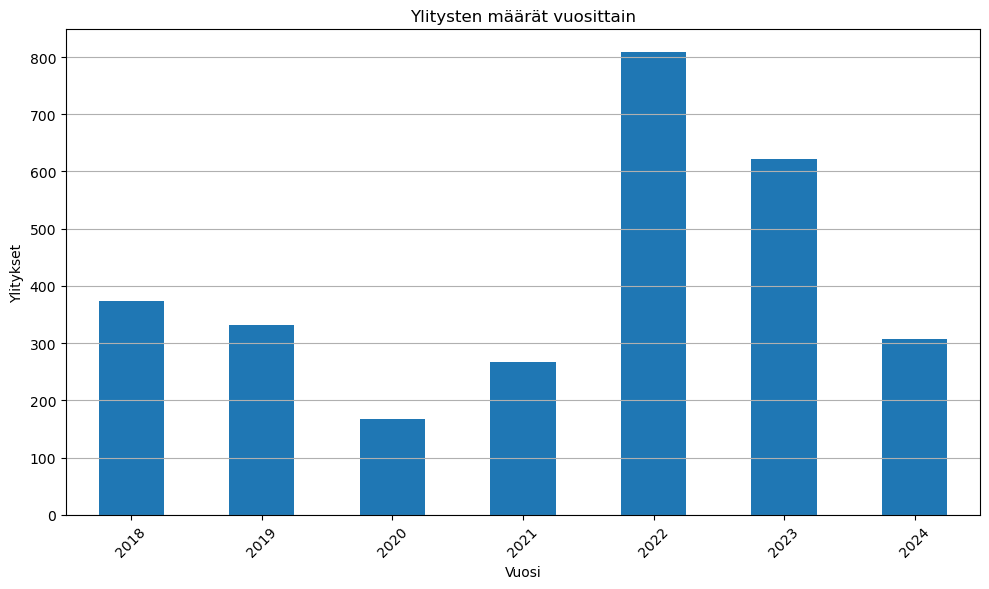

In [5]:
df['year'] = df['Päivämäärä'].dt.year
year_counts = df['year'].value_counts()
year_counts = year_counts.sort_index()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Ylitysten määrät vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Ylitykset')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

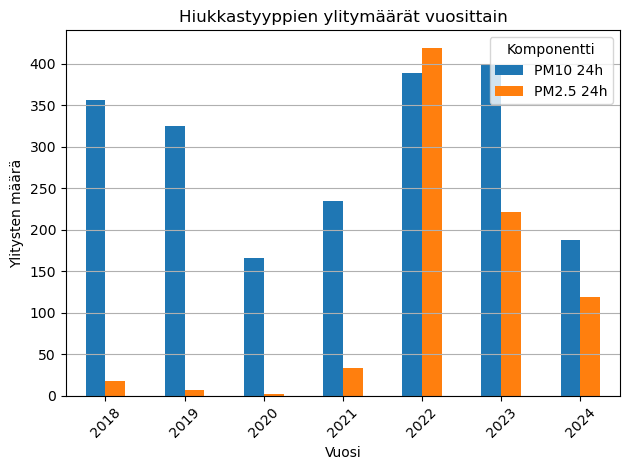

In [6]:
grouped_counts = df.groupby(['year', 'Komponentti']).size().unstack(fill_value=0)

grouped_counts.plot(kind='bar', stacked=False)
plt.title('Hiukkastyyppien ylitymäärät vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Ylitysten määrä')
plt.xticks(rotation=45)
plt.legend(title='Komponentti')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

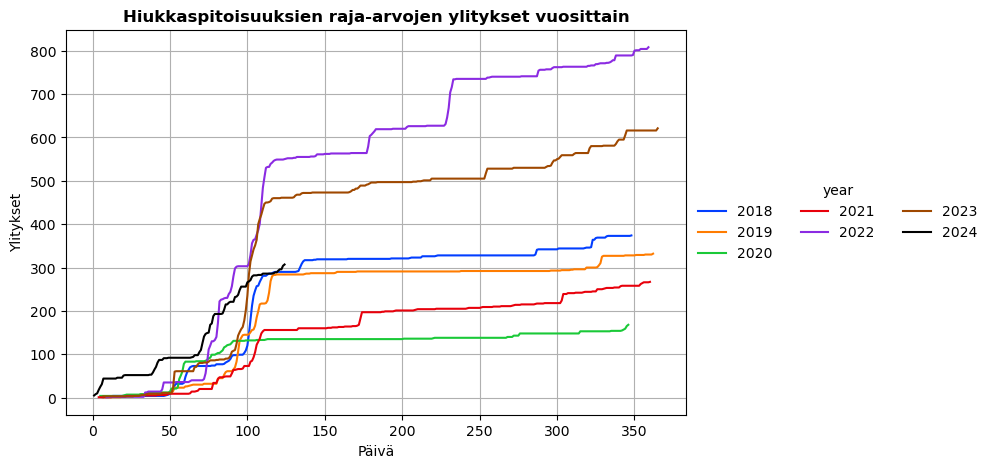

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
cumulative = df
cumulative = cumulative.set_index('Päivämäärä', inplace=False)

filled_data = cumulative.groupby('year').resample('D').size().groupby('year').cumsum()

filled_data = filled_data.reset_index()
filled_data = filled_data.rename(columns={0: "Ylitykset"})

filled_data['Päivä'] = filled_data["Päivämäärä"].dt.day_of_year

custom_palette = sns.color_palette("bright", len(filled_data['year'].unique()))
custom_palette[6] = "black"

fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=filled_data, x='Päivä', y='Ylitykset', hue='year', legend='full', ax=ax, palette=custom_palette)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False, ncols=3)

plt.title("Hiukkaspitoisuuksien raja-arvojen ylitykset vuosittain", fontweight="bold")
plt.grid(True)
plt.show()

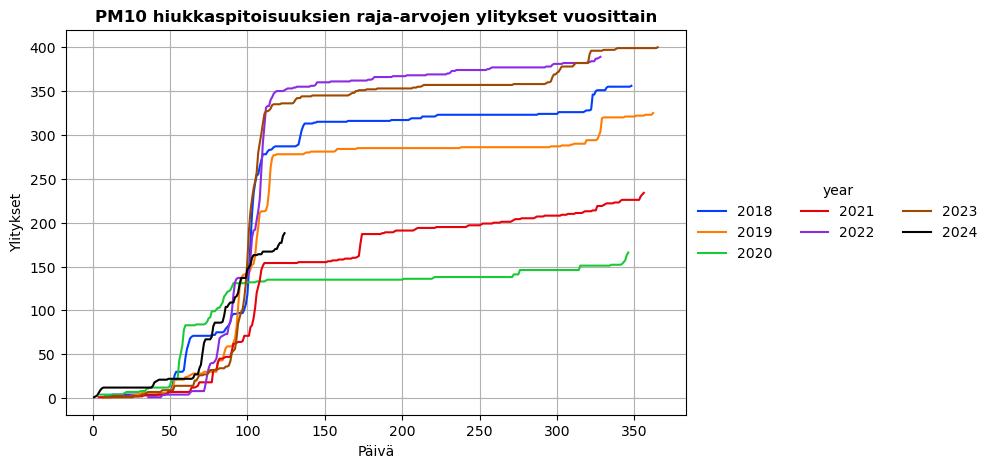

In [8]:
cumulative_PM10 = df[df["Komponentti"] == "PM10 24h"]
cumulative_PM10 = cumulative_PM10.set_index('Päivämäärä', inplace=False)

filled_data = cumulative_PM10.groupby('year').resample('D').size().groupby('year').cumsum()

filled_data = filled_data.reset_index()
filled_data = filled_data.rename(columns={0: "Ylitykset"})

filled_data['Päivä'] = filled_data["Päivämäärä"].dt.day_of_year

custom_palette = sns.color_palette("bright", len(filled_data['year'].unique()))
custom_palette[6] = "black"

fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=filled_data, x='Päivä', y='Ylitykset', hue='year', legend='full', ax=ax, palette=custom_palette)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False, ncols=3)

plt.title("PM10 hiukkaspitoisuuksien raja-arvojen ylitykset vuosittain", fontweight="bold")
plt.grid(True)
plt.show()